## This Notebook generates an image file for Figure 2
The figure is a frequency plot showing the number of fish assessed in the wild sampling events where fish were caught.

In [46]:
from pathlib import Path
import pandas as pd
import seaborn as sns

In [47]:
# define data location constants
DATA_DIR = Path('..') / 'source_data'
WILD_FISH_DATA = DATA_DIR / 'all_wild_fish_lice.csv'
WILD_EVENT_DATA = DATA_DIR / 'all_wild_sample_events.csv'

OUTPUT_DIR = Path('..') / 'output' / 'Figure_2'

## Format the data

In [48]:
# import and merge the data
events_df = pd.read_csv(WILD_EVENT_DATA, parse_dates=['sampledate'])
events_df['event_id'] = events_df['event_id'].astype(str)
fish_df = pd.read_csv(WILD_FISH_DATA)
fish_df['event_id'] = fish_df['event_id'].astype(str)

# merge on the right so we only get events where there were fish caught
wild_df = pd.merge(events_df, fish_df, on='event_id', how='right')

/tmp/ipykernel_824789/2291998140.py:4: DtypeWarning: Columns (0,1,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  fish_df = pd.read_csv(WILD_FISH_DATA)


In [49]:
wild_df.head()

,event_id,sampledate,region,dfozone,sample_site,latitude,longitude,source,fish_id,length,...,lep_unknown,cal_cop,cal_chal,cal_motile,cal_unknown,unknown_cop,unknown_chal,unknown_motile,unknown_unknown,lice_protocol
0,5666,2017-05-15 00:00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,1,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,5666,2017-05-15 00:00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,2,39.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,5666,2017-05-15 00:00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,3,45.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,5666,2017-05-15 00:00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,4,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5666,2017-05-15 00:00:00,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.701233,Mainstream Biological Consulting,5,38.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [50]:
# group by event and count the number of fish
wild_event_group = wild_df.groupby(['event_id'])
wild_num_fish_per_event_df = wild_event_group['fish_id'].agg('count').reset_index()

In [51]:
# rename fish_id column to 'fish_count' so it's clearer what it's for
wild_num_fish_per_event_df.rename(columns={'fish_id': 'fish_count'}, inplace=True)

wild_num_fish_per_event_df.head()

,event_id,fish_count
0,1,8
1,10,16
2,10000,2
3,10001,2
4,10002,1


## Create the frequency plot

In [52]:
# configure seaborn
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize": (30, 15)})
sns.set_context("paper")
sns.set_palette('colorblind')

sns.set(font_scale=2.4) 

[Text(0.5, 0, 'Number of fish in sample'),
 Text(0, 0.5, 'Number of sampling events'),
 (0.0, 115.0),
 (1.0, 1200.0),

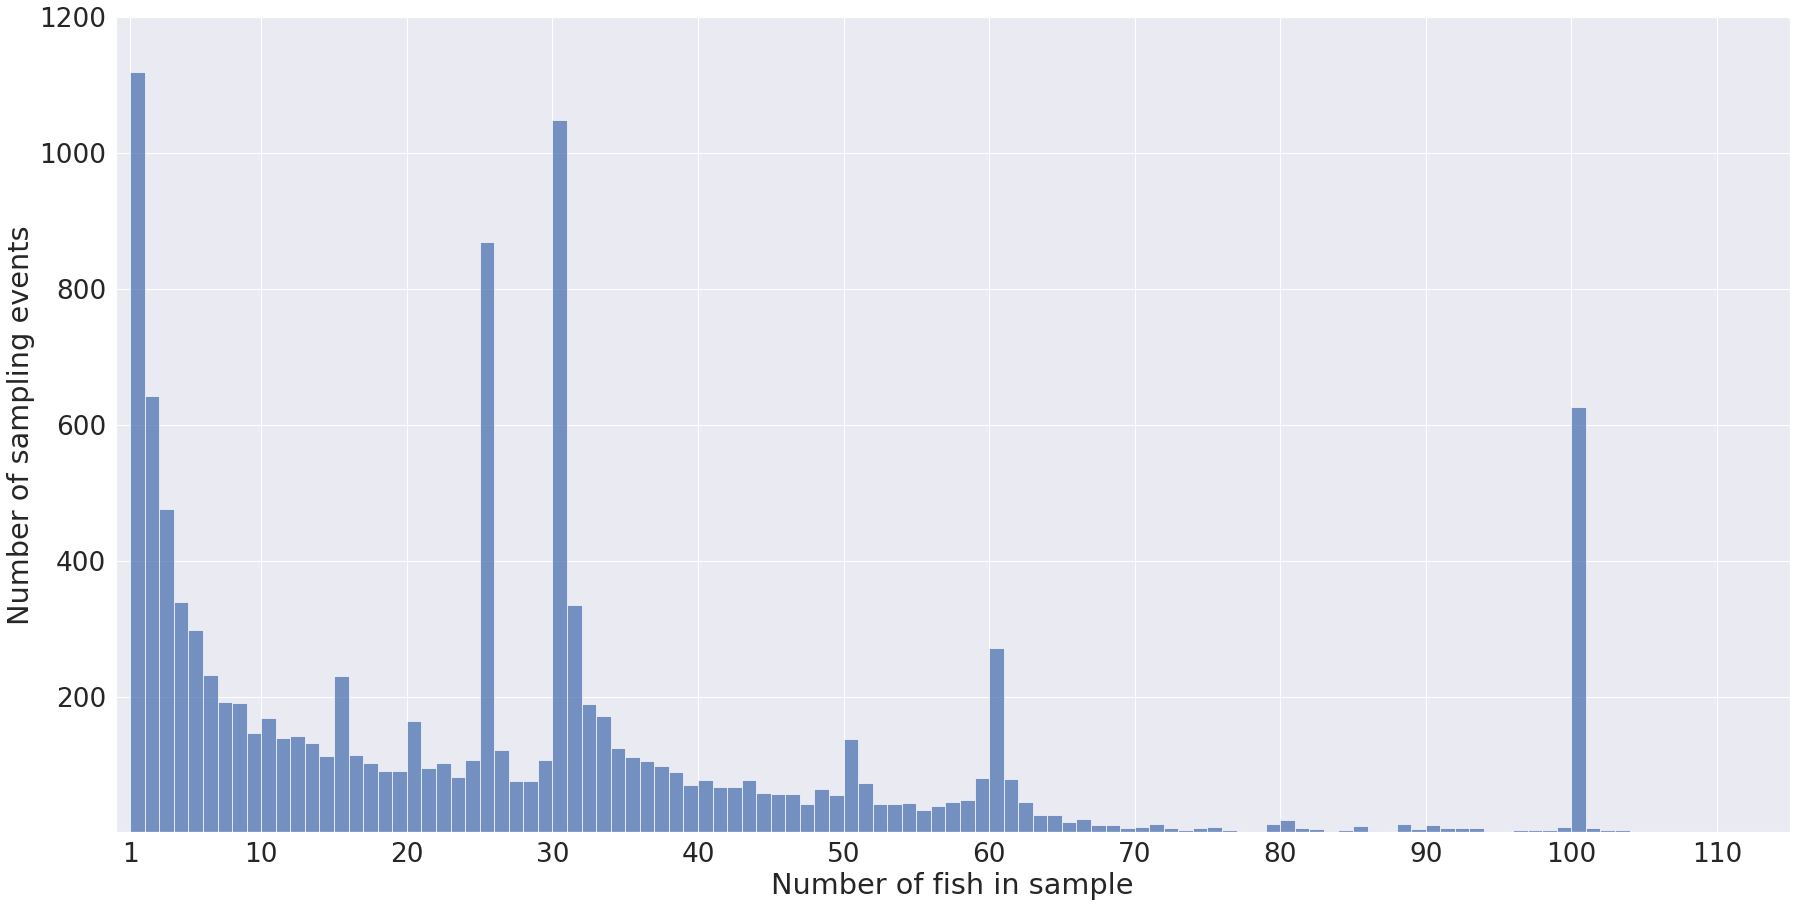

In [53]:
chart = sns.histplot(data=wild_num_fish_per_event_df, x='fish_count', binwidth=1)
chart.set(xlabel="Number of fish in sample", ylabel="Number of sampling events",  xlim=(0, 115), ylim=(1, 1200),
          xticks=[1] + list(range(10, 115, 10)))


In [54]:
chart.get_figure().savefig(OUTPUT_DIR / 'Fig2_wild_sample_freq.png', bbox_inches='tight')

In [55]:
# more than 115 fish in the events - not shown in the chart
wild_num_fish_per_event_df[wild_num_fish_per_event_df.fish_count > 115].sort_values('fish_count')

,event_id,fish_count
7831,6635,116
7510,6125,120
5675,3606,123
7819,6624,124
6398,4601,126
7835,6639,129
7836,6640,129
7822,6627,130
7824,6629,130
7827,6631,130
